In [47]:
import pandas as pd

awards = pd.read_csv(r'C:\Users\sydbi\Spring 2025\ISyE 3030\Final Project\ISyE 3030 Project - Awards.csv')
playoffs = pd.read_csv(r'C:\Users\sydbi\Spring 2025\ISyE 3030\Final Project\ISyE 3030 Project - Playoffs.csv')
season_summaries = pd.read_csv(r'C:\Users\sydbi\Spring 2025\ISyE 3030\Final Project\ISyE 3030 Project - Season Summaries.csv')
draft_data = pd.read_csv(r'C:\Users\sydbi\Spring 2025\ISyE 3030\Final Project\ISyE 3030 Project - Draft Data.csv')
player_data = pd.read_csv(r'C:\Users\sydbi\Spring 2025\ISyE 3030\Final Project\ISyE 3030 Project - Player Data.csv')

player_data.rename(columns={'Season (Year)': 'Year'}, inplace=True)
drafted_players = pd.merge(player_data, draft_data, on=['Player', 'Year'], how='inner')
# Merge draft_data with player_data
drafted_players = pd.merge(draft_data, player_data, on=['Player', 'Year'], how='inner')

# Playoff participation
playoff_participation = []
for index, row in drafted_players.iterrows():
    draft_year = row['Year']
    player_name = row['Player']
    playoff_entry = player_data[(player_data['Player'] == player_name) & (player_data['Year'] == draft_year) & (player_data['Season or Playoff'] == 'Playoffs')]
    if not playoff_entry.empty:
        playoff_participation.append(True)
    else:
        playoff_participation.append(False)

drafted_players['Playoff Participation'] = playoff_participation
drafted_players.drop_duplicates(subset=['Player', 'Year'], keep='first', inplace=True)
playoff_participation = []
for index, row in drafted_players.iterrows():
    draft_year = row['Year']
    player_name = row['Player']
    playoff_entry = player_data[(player_data['Player'] == player_name) & (player_data['Year'] == draft_year) & (player_data['Season or Playoff'] == 'Playoffs')]
    if not playoff_entry.empty:
        playoff_participation.append(True)
    else:
        playoff_participation.append(False)
drafted_players['Playoff Participation'] = playoff_participation
drafted_players.drop(columns=['Season or Playoff'], inplace=True)

#print(drafted_players)
awards['Player (Awardee)'] = awards['Player (Awardee)'].str.strip().str.lower()
drafted_players['Player'] = drafted_players['Player'].str.strip().str.lower()

#awards
awards_list = []
for index, row in drafted_players.iterrows():
    awards_list = []
    draft_year = int(row['Year'])
    player_name = row['Player']
    if player_name in awards['Player (Awardee)'].values:
        awards['Season (year)'] = awards['Season (year)'].astype(int)
        matching_award=awards.loc[(awards['Player (Awardee)'] == player_name) & (awards['Season (year)'] == draft_year), 'Award']
        matching_award_values = matching_award.values
        awards_string = ', '.join(matching_award_values)
        drafted_players.at[index, 'Awards'] = awards_string
    else:
        drafted_players.at[index, 'Awards'] = 'None'
        
print(drafted_players)

     Year  Round  Pick                                      Team_x  \
0    2023      1     1                               Indiana Fever   
1    2023      1     2                              Minnesota Lynx   
3    2023      1     3                    Dallas Wingsfrom Atlanta   
5    2023      1     6  Atlanta Dreamfrom New York via Connecticut   
7    2023      1     7                    Indiana Feverfrom Dallas   
..    ...    ...   ...                                         ...   
109  2020      2    23                             Connecticut Sun   
111  2020      2    24                          Washington Mystics   
112  2020      3    28                               Indiana Fever   
113  2020      3    29                             Phoenix Mercury   
115  2020      3    36                          Washington Mystics   

             Player      Prior Team         College              Team_y  Rank  \
0     aliyah boston  South Carolina  South Carolina       Indiana Fever     2 

In [34]:
descriptive_stats = drafted_players.describe()
print(descriptive_stats)



              Year      Round       Pick       Rank        Age      Games  \
count    84.000000  84.000000  84.000000  84.000000  84.000000  84.000000   
mean   2021.428571   1.654762  13.666667   9.357143  22.202381  19.809524   
std       1.133134   0.702732   8.637734   3.743727   0.966671  11.494867   
min    2020.000000   1.000000   1.000000   1.000000  19.000000   1.000000   
25%    2020.000000   1.000000   6.750000   7.000000  22.000000  10.000000   
50%    2021.000000   2.000000  13.000000   9.000000  22.000000  20.000000   
75%    2022.000000   2.000000  19.250000  12.000000  23.000000  30.000000   
max    2023.000000   3.000000  36.000000  19.000000  24.000000  40.000000   

       Games Started  Minutes Played  Field Goal  Field Goal Attempts  ...  \
count      84.000000       84.000000   84.000000            84.000000  ...   
mean        5.595238      294.392857   36.928571            90.464286  ...   
std        10.043423      281.500199   45.184437           101.547834  .

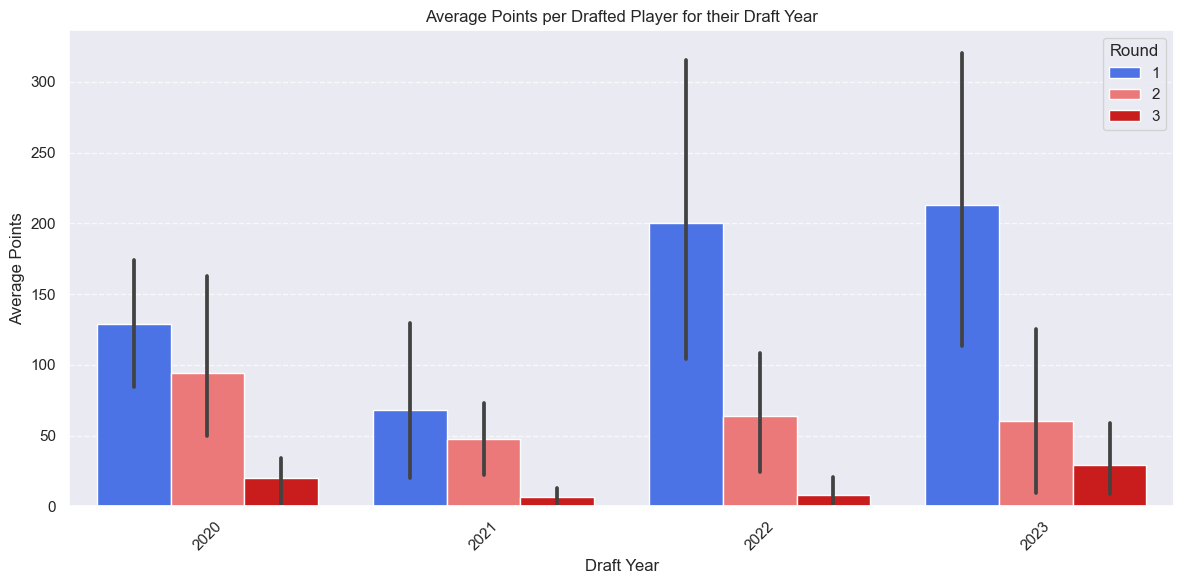

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

average_points = drafted_players.groupby(['Year', 'Player', 'Round'])['Points'].mean().reset_index()
tips = sns.load_dataset("tips") # some example data
palette = ["#3366ff", "#ff6666", "#e60000", "#4361EE", "80bfff"]

plt.figure(figsize=(12, 6))
sns.barplot(data=average_points, x='Year', y='Points', hue='Round', dodge=True, palette = palette)
plt.title('Average Points per Drafted Player for their Draft Year')
plt.xlabel('Draft Year')
plt.ylabel('Average Points')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




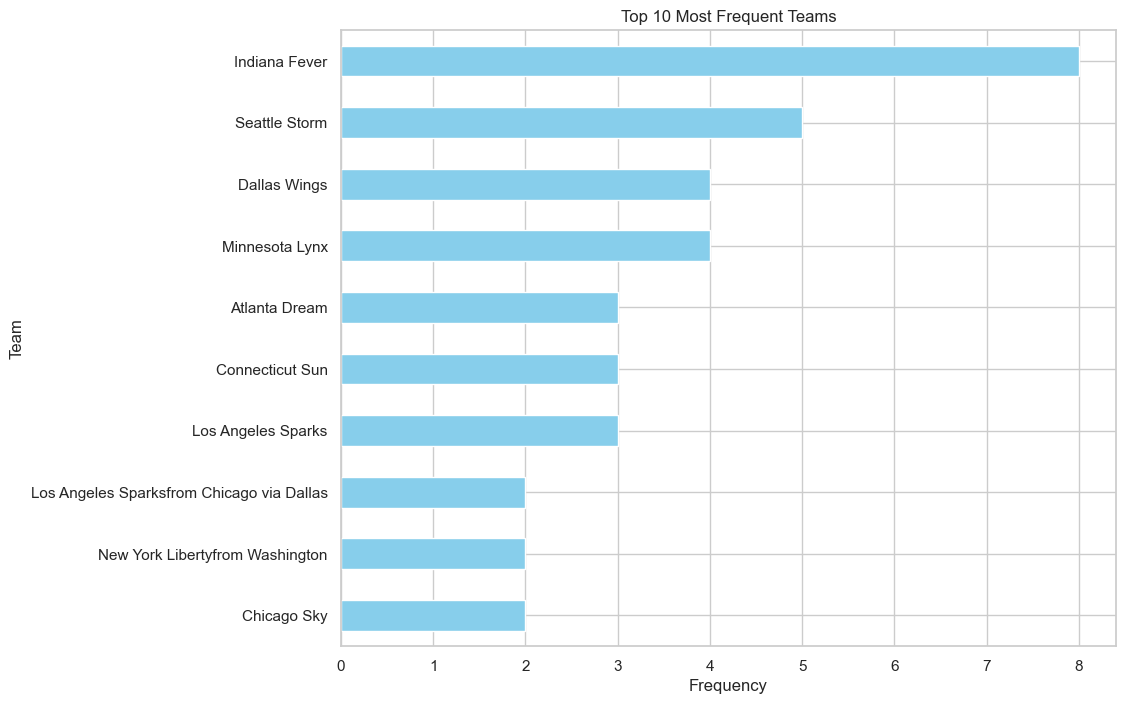

In [35]:
import matplotlib.pyplot as plt

# Get the top 10 most frequent teams
top_teams = drafted_players['Team_x'].value_counts().head(10)

plt.figure(figsize=(10, 8))
top_teams.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Frequent Teams')
plt.xlabel('Frequency')
plt.ylabel('Team')
plt.show()



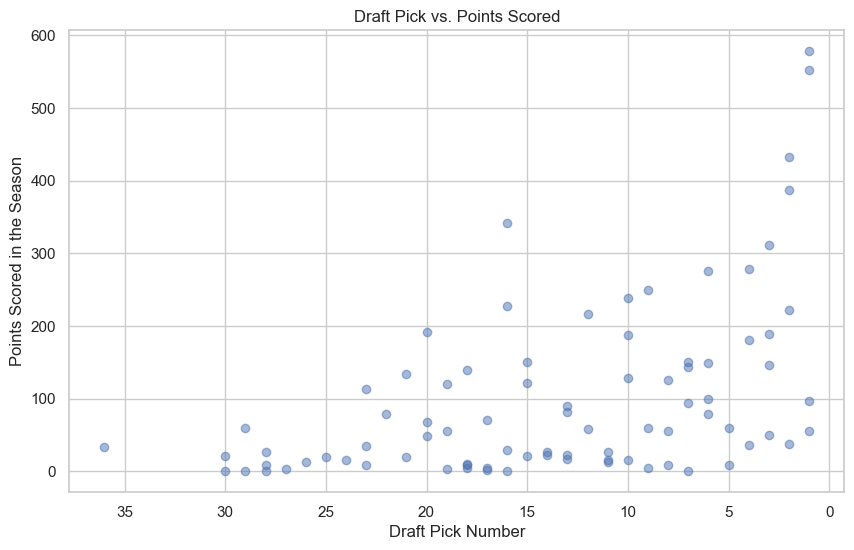

Correlation Coefficient between Draft Pick and Points Scored: -0.4855168994761261


In [36]:
#Scatter plot Data Visuals!

import pandas as pd
import matplotlib.pyplot as plt

# Scatter plot for Points vs. Draft Pick Number
plt.figure(figsize=(10, 6))
plt.scatter(drafted_players['Pick'], drafted_players['Points'], alpha=0.5)
plt.title('Draft Pick vs. Points Scored')
plt.xlabel('Draft Pick Number')
plt.ylabel('Points Scored in the Season')
plt.gca().invert_xaxis()
plt.show()

correlation_coefficient = drafted_players['Pick'].corr(drafted_players['Points'])

print("Correlation Coefficient between Draft Pick and Points Scored:", correlation_coefficient)



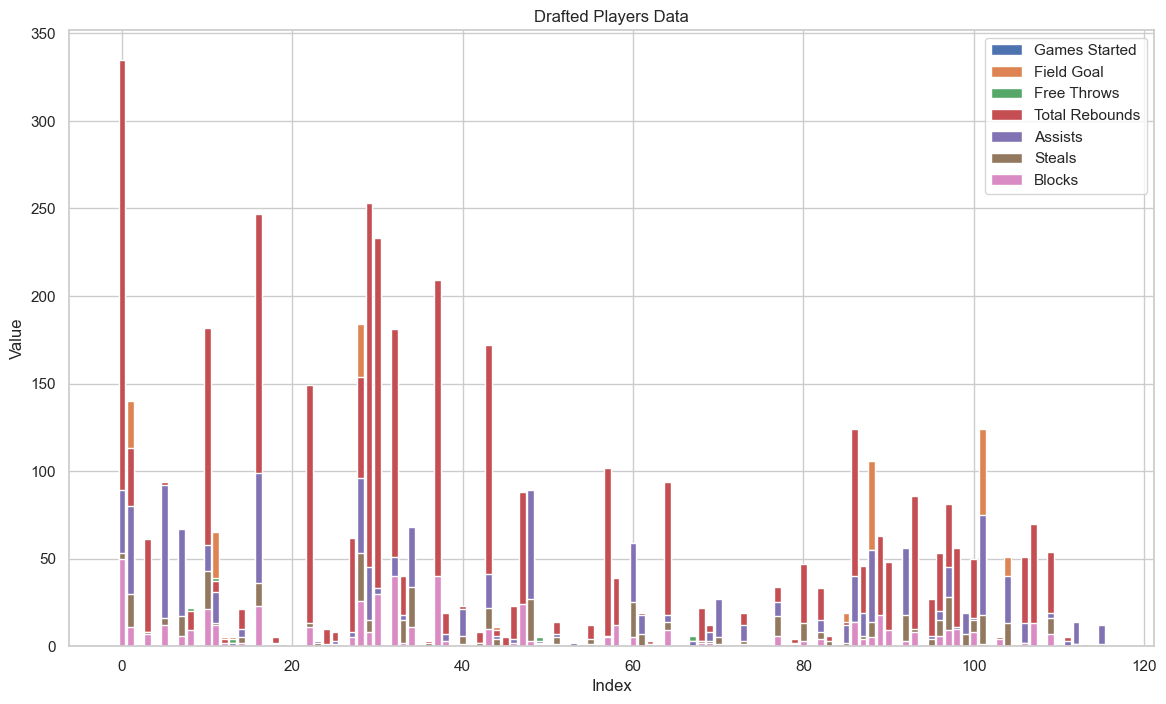

In [54]:
plt.figure(figsize=(14, 8))

# Create a bar for each column
for col in drafted_players.columns:
    if col in ['Games Started','Field Goal', 'Free Throws', 'Total Rebounds', 'Assists', 'Steals', 'Blocks']:  
        plt.bar(drafted_players.index, drafted_players[col], label=col)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Drafted Players Data')
plt.legend()
plt.show()

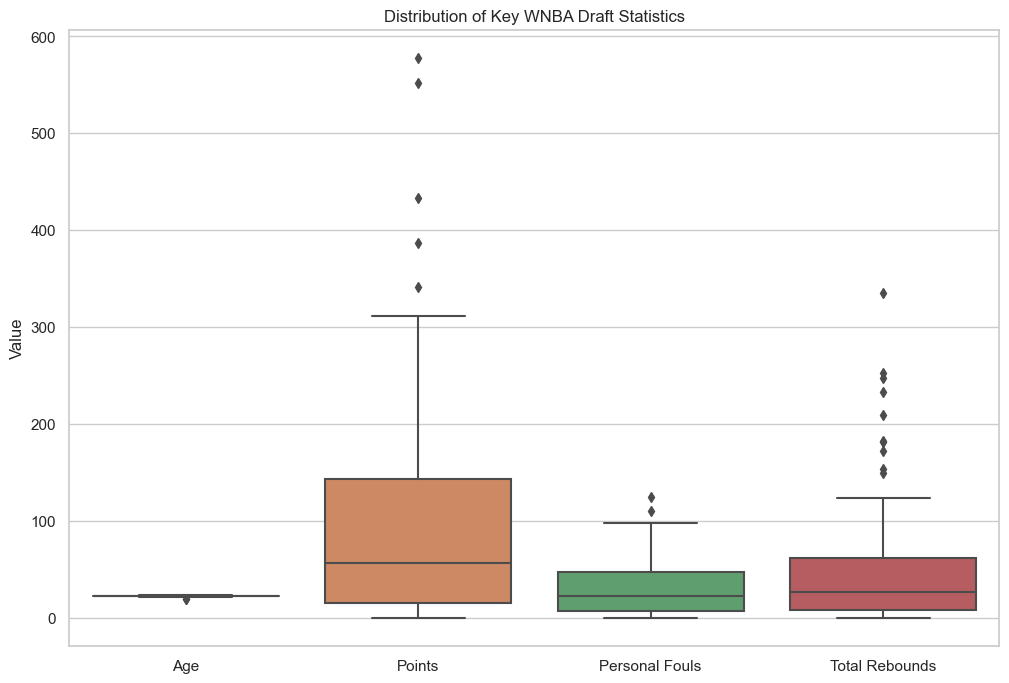

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure and a set of subplots
plt.figure(figsize=(12, 8))

# Select only the columns we're interested in for the box plot
columns_to_plot = ['Age', 'Points', 'Personal Fouls', 'Total Rebounds']
sns.boxplot(data=drafted_players[columns_to_plot])
plt.title('Distribution of Key WNBA Draft Statistics')
plt.ylabel('Value')
plt.show()


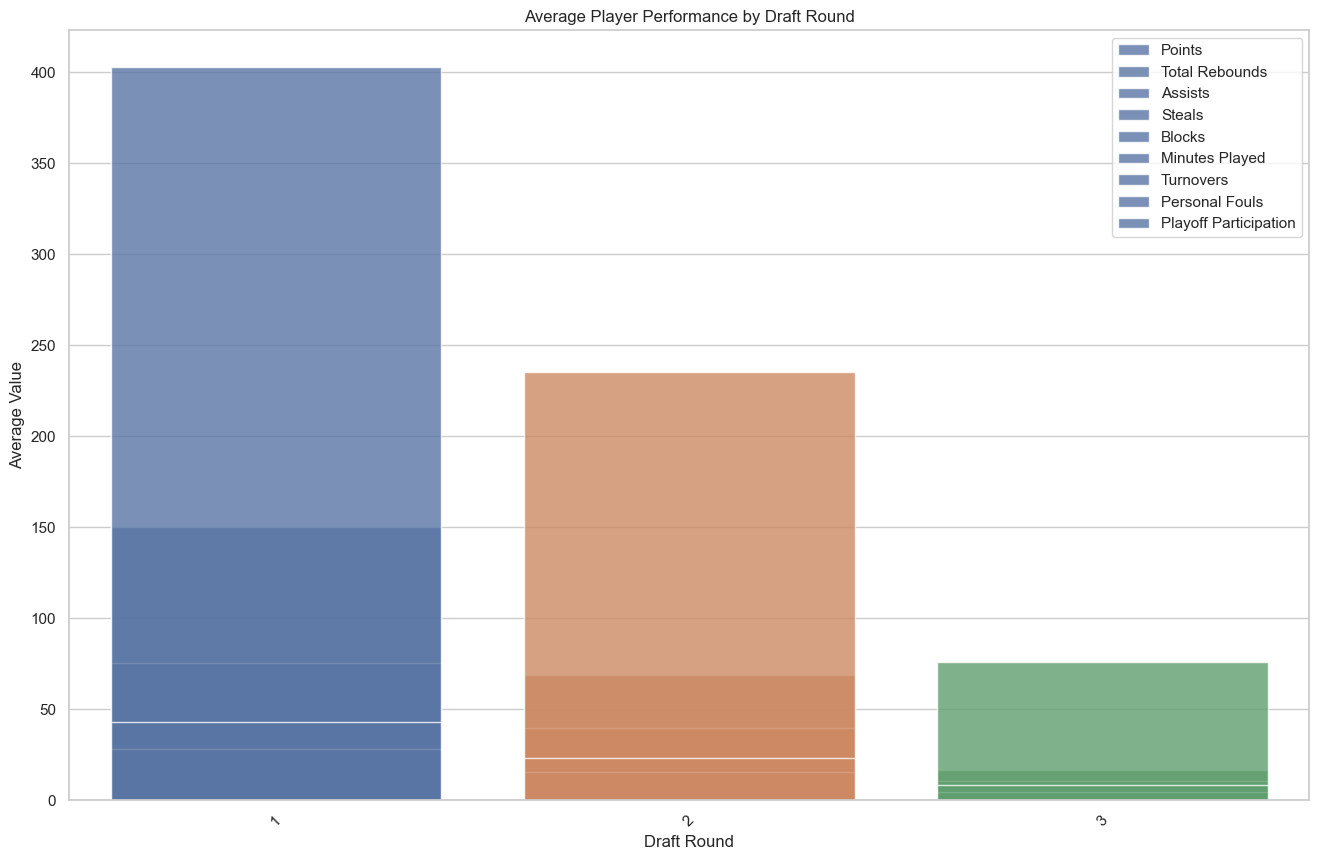

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'drafted_players' is your DataFrame and is loaded properly.
metrics = ['Points', 'Total Rebounds', 'Assists', 'Steals', 'Blocks']
average_metrics_per_round = drafted_players.groupby('Round')[metrics].mean().reset_index()

# Assuming 'drafted_players' is your DataFrame and is loaded properly.
additional_metrics = ['Minutes Played', 'Turnovers', 'Personal Fouls', 'Playoff Participation']
average_additional_metrics_per_round = drafted_players.groupby('Round')[additional_metrics].mean().reset_index()

# Concatenate the original and additional metrics dataframes
combined_metrics = pd.concat([average_metrics_per_round, average_additional_metrics_per_round[additional_metrics]], axis=1)

# Set up the figure and axis
plt.figure(figsize=(16, 10))

# Plotting the bar graphs for all metrics
for metric in metrics + additional_metrics:
    sns.barplot(x='Round', y=metric, data=combined_metrics, alpha=0.8, label=metric)

# Adding labels and title
plt.title('Average Player Performance by Draft Round')
plt.xlabel('Draft Round')
plt.ylabel('Average Value')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()




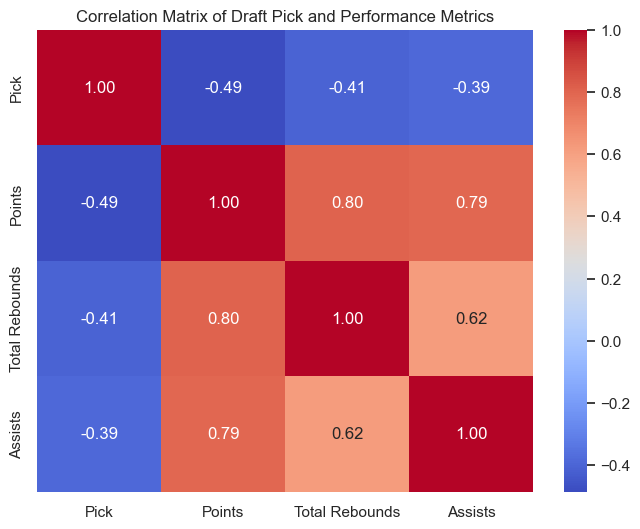

In [40]:
import seaborn as sns

# Calculating correlation matrix for selected columns
corr = drafted_players[['Pick', 'Points', 'Total Rebounds', 'Assists']].corr()

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Draft Pick and Performance Metrics')
plt.show()

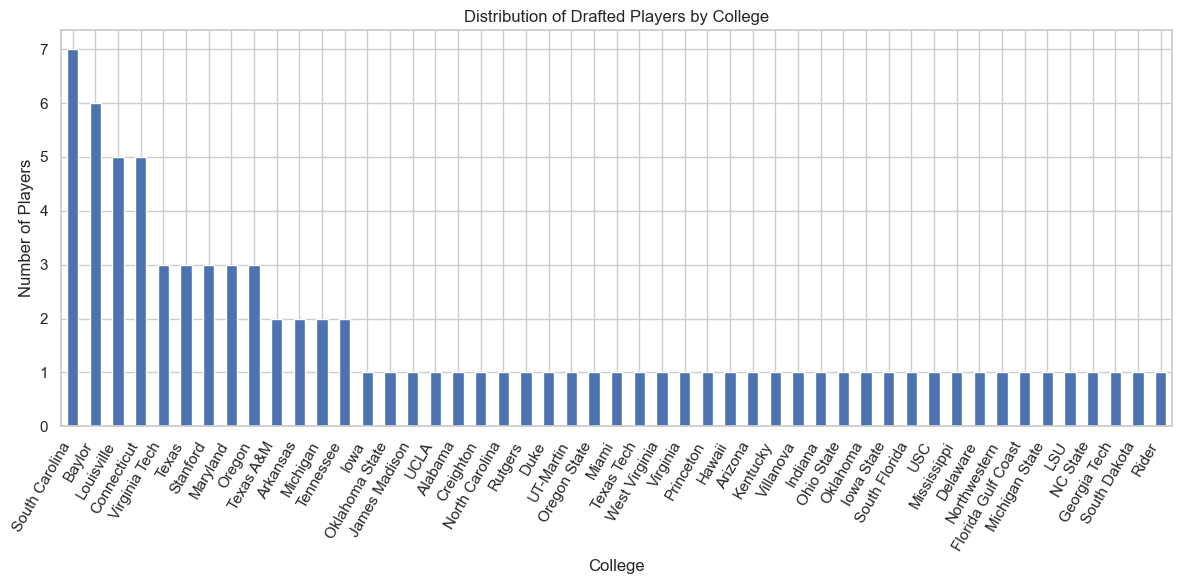

In [41]:
import matplotlib.pyplot as plt

# College Distribution
college_distribution = drafted_players['College'].value_counts()
plt.figure(figsize=(12, 6))  # Increase the figure width to make room for wider spacing
college_distribution.plot(kind='bar')
plt.title('Distribution of Drafted Players by College')
plt.xlabel('College')
plt.ylabel('Number of Players')
plt.xticks(rotation=60, ha='right')  # Increase rotation angle for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()




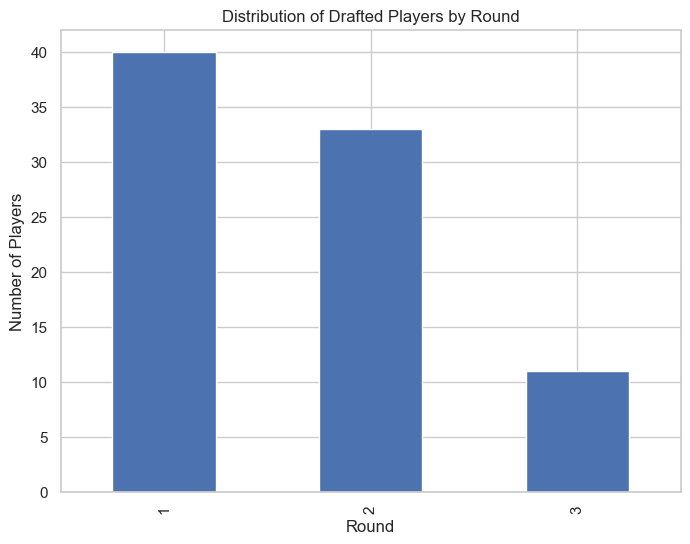

In [42]:
# Round Distribution
round_distribution = drafted_players['Round'].value_counts().sort_index()
round_distribution.plot(kind='bar', figsize=(8, 6))
plt.title('Distribution of Drafted Players by Round')
plt.xlabel('Round')
plt.ylabel('Number of Players')
plt.show()


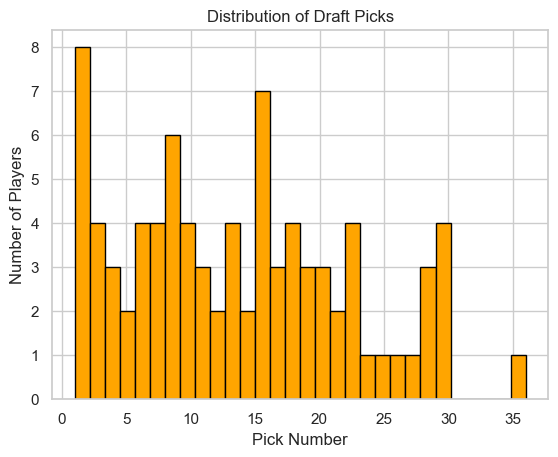

In [43]:
# Pick Distribution
plt.hist(drafted_players['Pick'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Draft Picks')
plt.xlabel('Pick Number')
plt.ylabel('Number of Players')
plt.show()


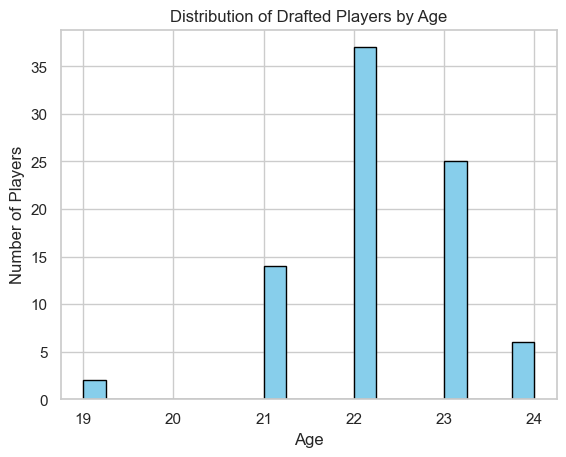

In [44]:
# Age Distribution
plt.hist(drafted_players['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Drafted Players by Age')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.show()
